In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.typing as npt
import matplotlib.pyplot as plt

#TODO
- fazer plot da legenda ficar sempre no canto superior esquerdo
- por titulo na legenda dizendo qual variṕavel esta avriando
- pegar chave e valor de valores fixos de forma mais elegante

In [2]:
def plot_empirical_error_convergence(loss: npt.NDArray[np.float_], nn_config: dict, not_fixed_param: str, annotate: bool = False) -> None:
    sns.set(style="darkgrid", color_codes=True, rc={"figure.figsize": (8, 5)})
    ax = sns.lineplot(data=loss, markers=True, marker="o", label=f"{nn_config[not_fixed_param]}")

    del nn_config[not_fixed_param]
    keys = list(nn_config.keys())
    vls = list(nn_config.values())

    plt.xticks(np.arange(len(loss)))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(title=not_fixed_param, fontsize=10)
    plt.title(f"Convergence of empirical error\n{keys[0]} = {vls[0]} , {keys[1]} = {vls[1]}")
    if annotate:
        for i, j in enumerate(loss):
            ax.annotate(str(np.round(j, 2)), xy=(i, j), xytext=(i, j + 0.02))

In [3]:
def plot_fixed(results: pd.DataFrame, hidden_layer_size: np.int_ = None, batch_size: np.int_ = None, learning_rate: np.float_ = None, annotate: bool = False) -> None:
    if hidden_layer_size is None and batch_size is None and learning_rate is None:
        raise "Especifique quais métricas devem ser fixadas"
    not_fixed: str = ""
    
    if hidden_layer_size and batch_size:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and batch_size == {batch_size}")[["learning_rate", "history"]]
        not_fixed = "learning_rate"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": batch_size, "learning_rate": e.learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if hidden_layer_size and learning_rate:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and learning_rate == {learning_rate}")[["batch_size", "history"]]
        not_fixed = "batch_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": e.batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if learning_rate and batch_size:
        aux: pd.DataFrame = results.query(f"batch_size == {batch_size} and learning_rate == {learning_rate}")[["hidden_layer_size", "history"]]
        not_fixed = "hidden_layer_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": e.hidden_layer_size, "batch_size": batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)

In [4]:
results: pd.DataFrame = pd.read_json("data/results.json")
results.nlargest(columns=["accuracy_score"], n=10)

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,hidden_layer_size,batch_size,learning_rate,history
28,0.928667,"[0.9318181818181811, 0.946745562130177, 0.9264...","[0.984, 0.9815950920245391, 0.9130434782608691...","[0.957198443579766, 0.9638554216867471, 0.9197...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 160, 0,...",42,0.3,100,20,1.0,"{'loss': [0.9336489439010621, 0.37243521213531..."
16,0.926667,"[0.9179104477611941, 0.9691358024691351, 0.952...","[0.984, 0.9631901840490791, 0.8695652173913041...","[0.949806949806949, 0.966153846153846, 0.90909...","[[123, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 157, 0,...",42,0.3,50,20,1.0,"{'loss': [0.8228465318679811, 0.37266308069229..."
15,0.921333,"[0.9384615384615381, 0.962962962962962, 0.9398...","[0.976, 0.9570552147239261, 0.905797101449275,...","[0.956862745098039, 0.9599999999999991, 0.9225...","[[122, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 156, 0,...",42,0.3,50,20,0.5,"{'loss': [0.945075452327728, 0.422654956579208..."
31,0.919333,"[0.9111111111111111, 0.9411764705882351, 0.893...","[0.984, 0.9815950920245391, 0.9130434782608691...","[0.9461538461538461, 0.9609609609609611, 0.903...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 160, 0,...",42,0.3,100,50,1.0,"{'loss': [1.182315111160278, 0.474792540073394..."
7,0.915333,"[0.9242424242424241, 0.9575757575757571, 0.947...","[0.976, 0.9693251533742331, 0.9130434782608691...","[0.9494163424124511, 0.9634146341463411, 0.929...","[[122, 0, 0, 0, 0, 2, 0, 0, 1, 0], [0, 158, 0,...",42,0.3,25,50,1.0,"{'loss': [1.132492542266845, 0.505914568901062..."
27,0.913333,"[0.9111111111111111, 0.951807228915662, 0.9191...","[0.984, 0.9693251533742331, 0.905797101449275,...","[0.9461538461538461, 0.9604863221884491, 0.912...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 158, 0,...",42,0.3,100,20,0.5,"{'loss': [0.940148770809173, 0.436065673828125..."
19,0.910667,"[0.9179104477611941, 0.952095808383233, 0.8985...","[0.984, 0.9754601226993861, 0.898550724637681,...","[0.949806949806949, 0.9636363636363631, 0.8985...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 159, 0,...",42,0.3,50,50,1.0,"{'loss': [1.050152659416198, 0.470676988363266..."
3,0.908000,"[0.8978102189781021, 0.940828402366863, 0.8936...","[0.984, 0.9754601226993861, 0.9130434782608691...","[0.9389312977099231, 0.9578313253012041, 0.903...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 159, 0,...",42,0.3,25,20,0.5,"{'loss': [1.002810716629028, 0.467017173767089..."
30,0.907333,"[0.9179104477611941, 0.9464285714285711, 0.899...","[0.984, 0.9754601226993861, 0.905797101449275,...","[0.949806949806949, 0.9607250755287011, 0.9025...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 159, 0,...",42,0.3,100,50,0.5,"{'loss': [1.2864066362380981, 0.58276462554931..."
18,0.905333,"[0.9389312977099231, 0.940828402366863, 0.9302...","[0.984, 0.9754601226993861, 0.8695652173913041...","[0.9609375000000001, 0.9578313253012041, 0.898...","[[123, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 159, 0,...",42,0.3,50,50,0.5,"{'loss': [1.331288695335388, 0.614262819290161..."


In [6]:
results.nsmallest(columns=["accuracy_score"], n=10)

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,hidden_layer_size,batch_size,learning_rate,history
14,0.112667,"[0.0, 0.0, 0.0, 0.0, 0.11266666666666601, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.20251647693229402, 0.0,...","[[0, 0, 0, 0, 125, 0, 0, 0, 0, 0], [0, 0, 0, 0...",42,0.3,50,1,10.0,"{'loss': [48.477787017822266, 53.8058700561523..."
26,0.114000,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.1032388663967...","[0.0, 0.07361963190184001, 0.0, 0.0, 0.0, 0.03...","[0.0, 0.137142857142857, 0.0, 0.0, 0.0, 0.0740...","[[0, 0, 0, 0, 0, 0, 125, 0, 0, 0], [0, 12, 0, ...",42,0.3,100,1,10.0,"{'loss': [16.01416778564453, 8.935510635375977..."
2,0.135333,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.11042524...","[0.0, 0.0, 0.0, 0.0, 0.242603550295857, 0.0064...","[0.0, 0.0, 0.0, 0.0, 0.39047619047619003, 0.01...","[[0, 0, 0, 0, 0, 0, 0, 125, 0, 0], [0, 0, 0, 0...",42,0.3,25,1,10.0,"{'loss': [11.9404935836792, 9.110442161560059,..."
11,0.136667,"[0.0, 0.0, 0.032608695652173, 0.0, 0.469178082...","[0.0, 0.0, 0.021739130434782, 0.0, 0.810650887...","[0.0, 0.0, 0.026086956521739, 0.0, 0.594360086...","[[0, 0, 74, 0, 1, 0, 0, 0, 0, 50], [0, 0, 0, 2...",42,0.3,25,3500,10.0,"{'loss': [2.557529687881469, 4.97476863861084,..."
23,0.196667,"[0.875, 0.6015037593984961, 0.1100090171325510...","[0.056, 0.9815950920245391, 0.884057971014492,...","[0.105263157894736, 0.7459207459207451, 0.1956...","[[7, 0, 118, 0, 0, 0, 0, 0, 0, 0], [0, 160, 3,...",42,0.3,50,3500,10.0,"{'loss': [2.5090785026550293, 10.9841337203979..."
35,0.260667,"[0.331460674157303, 0.351893095768374, 0.20512...","[0.9440000000000001, 0.9693251533742331, 0.115...","[0.49064449064449006, 0.516339869281045, 0.148...","[[118, 0, 0, 4, 0, 3, 0, 0, 0, 0], [0, 158, 0,...",42,0.3,100,3500,10.0,"{'loss': [2.40591287612915, 13.991756439208984..."
9,0.526000,"[0.602094240837696, 0.44021739130434706, 0.668...","[0.92, 0.9938650306748461, 0.7463768115942021,...","[0.7278481012658221, 0.6101694915254231, 0.705...","[[115, 0, 3, 1, 0, 0, 0, 0, 0, 6], [0, 162, 0,...",42,0.3,25,3500,0.5,"{'loss': [2.448828935623169, 2.342895030975342..."
25,0.536000,"[0.41637010676156505, 0.835227272727272, 0.0, ...","[0.936, 0.901840490797546, 0.0, 0.895104895104...","[0.5763546798029551, 0.867256637168141, 0.0, 0...","[[117, 0, 0, 4, 0, 2, 2, 0, 0, 0], [0, 147, 0,...",42,0.3,100,1,1.0,"{'loss': [4.630160808563232, 6.671459197998047..."
21,0.586000,"[0.657458563535911, 0.512820512820512, 0.58247...","[0.9520000000000001, 0.9815950920245391, 0.818...","[0.777777777777777, 0.673684210526315, 0.68072...","[[119, 0, 3, 1, 0, 2, 0, 0, 0, 0], [0, 160, 2,...",42,0.3,50,3500,0.5,"{'loss': [2.509795427322387, 2.286711454391479..."
34,0.592667,"[0.605, 0.9763779527559051, 0.291759465478841,...","[0.968, 0.760736196319018, 0.94927536231884, 0...","[0.744615384615384, 0.855172413793103, 0.44633...","[[121, 0, 2, 1, 0, 0, 1, 0, 0, 0], [0, 124, 36...",42,0.3,100,3500,1.0,"{'loss': [2.650531768798828, 2.920224666595459..."


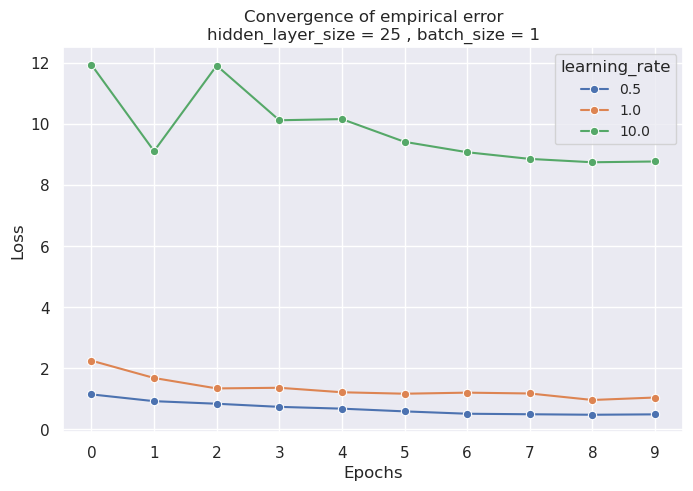

In [5]:
ex = results.iloc[0]
plot_fixed(results=results, hidden_layer_size=ex["hidden_layer_size"], batch_size=ex["batch_size"], learning_rate=None)